In [ ]:
import torch
import random
import torch.nn as nn

from torchvision import transforms, datasets

trainset = datasets.CIFAR10(root ='./ data ',train =True,download =True ,
transform = transforms.ToTensor())

testset = datasets.CIFAR10(root ='./ data ',train = False,download =True ,
transform = transforms.ToTensor())

SEED = 42

torch.manual_seed(SEED)
random.seed(SEED)

100%|██████████| 170M/170M [00:14<00:00, 12.0MB/s]


In [ ]:
#1-(b)
Classes = trainset.classes

class_to_first_idx = {}
num_classes = 10

for idx, label in enumerate(trainset.targets):

  if not (label in class_to_first_idx):
      class_to_first_idx[label] = idx

  if len((class_to_first_idx)) == num_classes:
      break

In [ ]:
for i in range(0,10):
  print(trainset[class_to_first_idx[i]])

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0

In [ ]:
import matplotlib.pyplot as plt

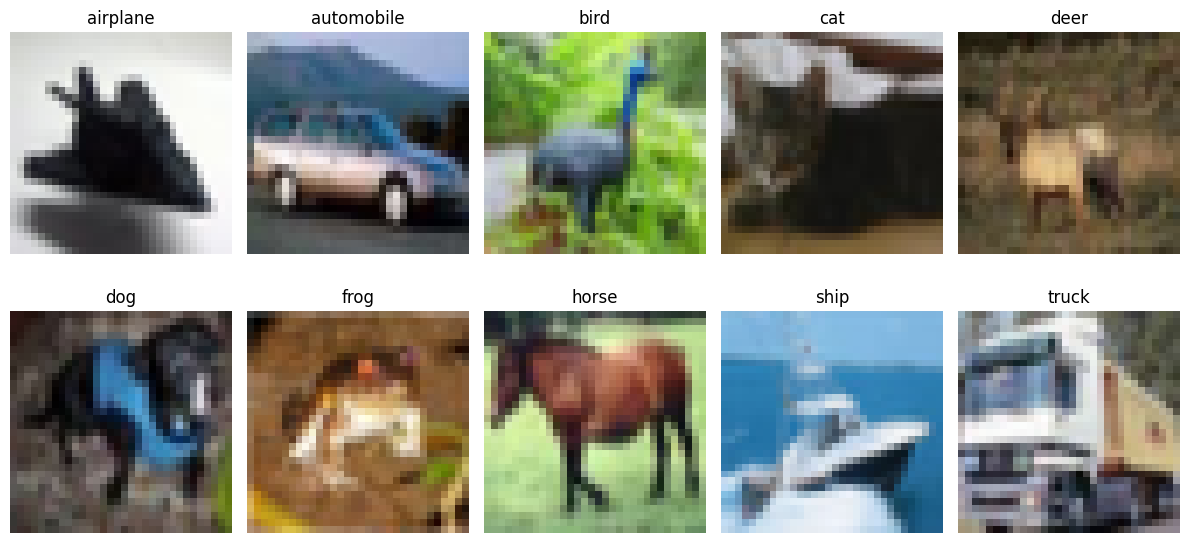

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(12,6))
axes = axes.flatten()

for i in range(num_classes):
  data_index = class_to_first_idx[i]
  image_tensor, label = trainset[data_index]
  change_col = image_tensor.permute(1,2,0)
  ax = axes[i]
  ax.imshow(change_col)
  ax.set_title(Classes[label])
  ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#1-(c)
print(len(trainset))

50000


In [ ]:
check_class = {}
for _, label in trainset:
  check_class[label] = check_class.get(label,0) + 1

print(check_class)

{6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}


In [ ]:
check = int(len(trainset) * 0.9)
Train = trainset[:check]
Val = trainset[check:]

TypeError: Cannot handle this data type: (1, 1, 32, 3), |u1

In [ ]:
from torch.utils.data import random_split

total_size = len(trainset)
train_size = int(total_size * 0.9)
val_size = total_size - train_size


Train, Val = random_split(trainset,[train_size,val_size],generator=torch.Generator().manual_seed(SEED))

print(len(Train))
print(len(Val))

45000
5000


In [ ]:
check_train = {}

for _, label in Train:
  check_train[label] = check_train.get(label,0) + 1

print(check_train)

{6: 4493, 2: 4468, 8: 4496, 9: 4499, 4: 4529, 5: 4486, 7: 4500, 0: 4512, 3: 4529, 1: 4488}


In [ ]:
airplane_idx = 0
ship_idx = 8

def pick_class(Train,class_index):

  information = Train.dataset
  index_info = Train.indices

  pick_class = [
      idx for idx in index_info
      if information.targets[idx] == class_index
  ]

  return random.choice(pick_class)

In [ ]:
random_airplane =Train.dataset[pick_class(Train,airplane_idx)][0].view(-1)
random_ship = Train.dataset[pick_class(Train,ship_idx)][0].view(-1)

W = (random_airplane - random_ship)
b = - torch.dot(W,(random_ship+random_airplane)/2)

In [ ]:
image_for_size = trainset[0][0]
C,H, Width = image_for_size.shape

input_size = C * H * Width
output_size = 1

skeleton = nn.Linear(input_size,output_size)

with torch.no_grad(): #Initializaion
  skeleton.weight.data = W.unsqueeze(0)
  skeleton.bias.data = torch.tensor([b])

In [ ]:
#Pick two classes Images from total Train, Val Set
from torch.utils.data import TensorDataset

svm_train_images = []
svm_train_labels = []

for idx in Train.indices:
  image, label = Train.dataset[idx]

  if label == airplane_idx:
    svm_train_images.append(image.view(-1))
    svm_train_labels.append(1.0)
  elif label == ship_idx:
    svm_train_images.append(image.view(-1))
    svm_train_labels.append(-1.0)

svm_train_images_tensor = torch.stack(svm_train_images)
svm_train_labels_tensor = torch.tensor(svm_train_labels).view(-1,1)
SVM_TRAIN = TensorDataset(svm_train_images_tensor, svm_train_labels_tensor)

svm_val_images = []
svm_val_labels = []

for idx in Val.indices:
  image, label = Val.dataset[idx]

  if label == airplane_idx:
    svm_val_images.append(image.view(-1))
    svm_val_labels.append(1.0)
  elif label == ship_idx:
    svm_val_images.append(image.view(-1))
    svm_val_labels.append(-1.0)

svm_val_images_tensor = torch.stack(svm_val_images)
svm_val_labels_tensor = torch.tensor(svm_val_labels).view(-1,1)
SVM_VAL = TensorDataset(svm_val_images_tensor, svm_val_labels_tensor)

In [ ]:
#1-d
def Hinge_Loss(score,label,weight,Lambda):
  return torch.mean(torch.clamp(1-score*label,0)) + Lambda * weight.pow(2).sum() #.sqrt() -> sqrt is Monotonic increasing and when x = 0, cannot calculate derivative

In [ ]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def train_evaluate_svm(model, svm_train_dataset, svm_val_dataset,
                         loss_fn, learning_rate, lambda_param,
                         num_epochs, batch_size, device):

    print(f"Hyperparameters: LR={learning_rate}, Lambda={lambda_param}, Epochs={num_epochs}, Batch={batch_size}")

    model = model.to(device)

    svm_train_loader = DataLoader(svm_train_dataset, batch_size=batch_size, shuffle=True)
    svm_val_loader = DataLoader(svm_val_dataset, batch_size=batch_size, shuffle=False)

    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_loss_history = []
    val_accuracy_history = []

    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0

        for images, labels in svm_train_loader:

            images = images.to(device)
            labels = labels.to(device)

            scores = model(images)

            loss = loss_fn(scores, labels, model.weight, lambda_param)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_train_loss = running_loss / len(svm_train_loader.dataset)
        train_loss_history.append(epoch_train_loss)

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for val_images, val_labels in svm_val_loader:


                val_images = val_images.to(device)
                val_labels = val_labels.to(device)


                val_scores = model(val_images)

                predicted = torch.sign(val_scores)

                correct += (predicted == val_labels).sum().item()
                total += val_labels.size(0)

        epoch_val_accuracy = 100 * correct / total
        val_accuracy_history.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")

    return train_loss_history, val_accuracy_history

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print({device})

{device(type='cuda')}


In [ ]:
#problem 1 - (e)
train_loss_64, val_64 = train_evaluate_svm(model=skeleton, svm_train_dataset=SVM_TRAIN, svm_val_dataset=SVM_VAL,
                         loss_fn=Hinge_Loss, learning_rate=0.001, lambda_param = 0.01,
                         num_epochs = 10, batch_size = 64, device = device)

Hyperparameters: LR=0.001, Lambda=0.01, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 44.3177, Val Accuracy: 52.92%
Epoch 2/10, Train Loss: 37.6604, Val Accuracy: 53.93%
Epoch 3/10, Train Loss: 34.9273, Val Accuracy: 54.33%
Epoch 4/10, Train Loss: 33.8594, Val Accuracy: 53.73%
Epoch 5/10, Train Loss: 33.3668, Val Accuracy: 54.13%
Epoch 6/10, Train Loss: 33.0198, Val Accuracy: 54.03%
Epoch 7/10, Train Loss: 32.7098, Val Accuracy: 54.23%
Epoch 8/10, Train Loss: 32.4129, Val Accuracy: 54.23%
Epoch 9/10, Train Loss: 32.1203, Val Accuracy: 54.13%
Epoch 10/10, Train Loss: 31.8350, Val Accuracy: 54.13%


In [ ]:
#problem 1- (f)
SVM_TRAIN_MEAN = svm_train_images_tensor.mean(dim=0)
SVM_TRAIN_STD = svm_train_images_tensor.std(dim=0) + 1e-6

NOM_TRAIN_TENSOR = (svm_train_images_tensor - SVM_TRAIN_MEAN) / SVM_TRAIN_STD
NOM_VAL_TENSOR = (svm_val_images_tensor - SVM_TRAIN_MEAN) / SVM_TRAIN_STD

NORMAL_TRAIN_SET = TensorDataset(NOM_TRAIN_TENSOR, svm_train_labels_tensor)
NORMAL_VAL_SET = TensorDataset(NOM_VAL_TENSOR, svm_val_labels_tensor)

new_skeleton = nn.Linear(input_size,output_size)

with torch.no_grad(): #Initializaion
  new_skeleton.weight.data = W.unsqueeze(0)
  new_skeleton.bias.data = torch.tensor([b])

In [ ]:
#problem 1- (g)
NOM_LOSS_64, NOM_VAL_64 = train_evaluate_svm(model=new_skeleton, svm_train_dataset=NORMAL_TRAIN_SET, svm_val_dataset=NORMAL_VAL_SET,
                         loss_fn=Hinge_Loss, learning_rate=0.001, lambda_param = 0.01,
                         num_epochs = 10, batch_size = 64, device = device)

Hyperparameters: LR=0.001, Lambda=0.01, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 177.4579, Val Accuracy: 52.42%
Epoch 2/10, Train Loss: 161.4729, Val Accuracy: 53.12%
Epoch 3/10, Train Loss: 148.5533, Val Accuracy: 54.44%
Epoch 4/10, Train Loss: 139.1699, Val Accuracy: 54.94%
Epoch 5/10, Train Loss: 132.5014, Val Accuracy: 53.63%
Epoch 6/10, Train Loss: 127.5657, Val Accuracy: 52.92%
Epoch 7/10, Train Loss: 123.6002, Val Accuracy: 52.72%
Epoch 8/10, Train Loss: 120.3418, Val Accuracy: 52.62%
Epoch 9/10, Train Loss: 117.5487, Val Accuracy: 52.42%
Epoch 10/10, Train Loss: 115.1691, Val Accuracy: 52.22%


In [ ]:
#1 - (h), (i) : I will change batch_sizes, lambdas, learing_rates, and Normalization

In [ ]:
batch_sizes = [64,128,256,512]
lambdas = [0.1, 0.01, 0.001, 0.0]
learning_rates = [0.0001,0.001, 0.01]

without_normalization = {}

for B in batch_sizes:
  for L in lambdas:
    for lr in learning_rates:
      skeleton_skratch = nn.Linear(input_size,output_size)
      with torch.no_grad(): #Initializaion
       skeleton_skratch.weight.data = W.unsqueeze(0)
       skeleton_skratch.bias.data = torch.tensor([b])
      result_loss, result_val = train_evaluate_svm(model=skeleton_skratch, svm_train_dataset=SVM_TRAIN, svm_val_dataset=SVM_VAL,
                         loss_fn=Hinge_Loss, learning_rate=lr, lambda_param = L,
                         num_epochs = 10, batch_size = B, device = device)
      without_normalization[(B, L, lr)] = result_val[-1]

best_parameter = max(without_normalization,key=without_normalization.get)
best_acc = without_normalization[best_parameter]

print(f"Best Accuracy: {best_acc:.2f}%")
print(f"Best Hyperparameters (Batch, Lambda, LR): {best_parameter}")

Hyperparameters: LR=0.0001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 78.0533, Val Accuracy: 52.52%
Epoch 2/10, Train Loss: 76.1649, Val Accuracy: 52.62%
Epoch 3/10, Train Loss: 74.3860, Val Accuracy: 52.42%
Epoch 4/10, Train Loss: 72.7093, Val Accuracy: 52.32%
Epoch 5/10, Train Loss: 71.1444, Val Accuracy: 52.02%
Epoch 6/10, Train Loss: 69.6806, Val Accuracy: 52.32%
Epoch 7/10, Train Loss: 68.3235, Val Accuracy: 52.92%
Epoch 8/10, Train Loss: 67.0686, Val Accuracy: 53.02%
Epoch 9/10, Train Loss: 65.9104, Val Accuracy: 52.92%
Epoch 10/10, Train Loss: 64.8386, Val Accuracy: 53.23%
Hyperparameters: LR=0.001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 70.8976, Val Accuracy: 53.53%
Epoch 2/10, Train Loss: 60.5636, Val Accuracy: 53.83%
Epoch 3/10, Train Loss: 55.8921, Val Accuracy: 53.53%
Epoch 4/10, Train Loss: 53.5150, Val Accuracy: 53.73%
Epoch 5/10, Train Loss: 51.8118, Val Accuracy: 53.23%
Epoch 6/10, Train Loss: 50.3344, Val Accuracy: 52.62%
Epoch 7/10, Trai

In [ ]:
with_random = {}

for B in batch_sizes:
  for L in lambdas:
    for lr in learning_rates:
      skeleton_random = nn.Linear(input_size,output_size)
      # there is no with torch.no_grad()
      result_loss, result_val = train_evaluate_svm(model=skeleton_random, svm_train_dataset=SVM_TRAIN, svm_val_dataset=SVM_VAL,
                         loss_fn=Hinge_Loss, learning_rate=lr, lambda_param = L,
                         num_epochs = 10, batch_size = B, device = device)
      with_random[(B, L, lr)] = result_val[-1]

best_parameter = max(with_random,key=with_random.get)
best_acc = with_random[best_parameter]

print(f"Best Accuracy: {best_acc:.2f}%")
print(f"Best Hyperparameters (Batch, Lambda, LR): {best_parameter}")

Hyperparameters: LR=0.0001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 1.0125, Val Accuracy: 52.52%
Epoch 2/10, Train Loss: 0.9663, Val Accuracy: 49.70%
Epoch 3/10, Train Loss: 0.9367, Val Accuracy: 54.44%
Epoch 4/10, Train Loss: 0.9118, Val Accuracy: 58.47%
Epoch 5/10, Train Loss: 0.8878, Val Accuracy: 63.00%
Epoch 6/10, Train Loss: 0.8654, Val Accuracy: 64.62%
Epoch 7/10, Train Loss: 0.8469, Val Accuracy: 64.92%
Epoch 8/10, Train Loss: 0.8332, Val Accuracy: 65.32%
Epoch 9/10, Train Loss: 0.8229, Val Accuracy: 64.72%
Epoch 10/10, Train Loss: 0.8155, Val Accuracy: 65.62%
Hyperparameters: LR=0.001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.8856, Val Accuracy: 64.82%
Epoch 2/10, Train Loss: 0.8026, Val Accuracy: 66.43%
Epoch 3/10, Train Loss: 0.7855, Val Accuracy: 64.62%
Epoch 4/10, Train Loss: 0.7794, Val Accuracy: 65.42%
Epoch 5/10, Train Loss: 0.7723, Val Accuracy: 66.83%
Epoch 6/10, Train Loss: 0.7651, Val Accuracy: 67.14%
Epoch 7/10, Train Loss: 0.7588, 

In [ ]:
with_random_normal = {}

for B in batch_sizes:
  for L in lambdas:
    for lr in learning_rates:
      skeleton_random = nn.Linear(input_size,output_size)
      # there is no with torch.no_grad()
      result_loss, result_val = train_evaluate_svm(model=skeleton_random, svm_train_dataset=NORMAL_TRAIN_SET, svm_val_dataset=NORMAL_VAL_SET,
                         loss_fn=Hinge_Loss, learning_rate=lr, lambda_param = L,
                         num_epochs = 10, batch_size = B, device = device)
      with_random_normal[(B, L, lr)] = result_val[-1]

best_parameter_normal = max(with_random_normal, key=with_random_normal.get)
best_acc_normal = with_random_normal[best_parameter_normal]

print(f"Best Accuracy: {best_acc_normal:.2f}%")
print(f"Best Hyperparameters (Batch, Lambda, LR): {best_parameter_normal}")

Hyperparameters: LR=0.0001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.8850, Val Accuracy: 64.52%
Epoch 2/10, Train Loss: 0.7947, Val Accuracy: 65.73%
Epoch 3/10, Train Loss: 0.7755, Val Accuracy: 66.03%
Epoch 4/10, Train Loss: 0.7651, Val Accuracy: 66.83%
Epoch 5/10, Train Loss: 0.7562, Val Accuracy: 67.04%
Epoch 6/10, Train Loss: 0.7493, Val Accuracy: 67.64%
Epoch 7/10, Train Loss: 0.7431, Val Accuracy: 68.45%
Epoch 8/10, Train Loss: 0.7380, Val Accuracy: 68.55%
Epoch 9/10, Train Loss: 0.7331, Val Accuracy: 69.25%
Epoch 10/10, Train Loss: 0.7294, Val Accuracy: 68.85%
Hyperparameters: LR=0.001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.7769, Val Accuracy: 68.55%
Epoch 2/10, Train Loss: 0.7245, Val Accuracy: 69.66%
Epoch 3/10, Train Loss: 0.7058, Val Accuracy: 69.46%
Epoch 4/10, Train Loss: 0.6938, Val Accuracy: 70.46%
Epoch 5/10, Train Loss: 0.6859, Val Accuracy: 70.46%
Epoch 6/10, Train Loss: 0.6775, Val Accuracy: 70.16%
Epoch 7/10, Train Loss: 0.6731, 

In [ ]:
#1- (j) : Best Hyperparameters with Normalization (Batch, Lambda, LR): (64, 0.001, 0.001)
BEST_LR = 0.001
BEST_LAMDA = 0.001
BEST_BATCH = 64
EPOCHS = 10

svm_test_images = []
svm_test_labels = []

for i in range(len(testset.targets)):
    image, label = testset[i]

    if label == airplane_idx:
        svm_test_images.append(image.view(-1))
        svm_test_labels.append(1.0)
    elif label == ship_idx:
        svm_test_images.append(image.view(-1))
        svm_test_labels.append(-1.0)

svm_test_images_tensor = torch.stack(svm_test_images)
svm_test_labels_tensor = torch.tensor(svm_test_labels).view(-1, 1)

NOM_TEST_TENSOR = (svm_test_images_tensor - SVM_TRAIN_MEAN) / SVM_TRAIN_STD
NORMAL_TEST_SET = TensorDataset(NOM_TEST_TENSOR, svm_test_labels_tensor)

In [ ]:
fianle_model = nn.Linear(input_size, output_size)

train_evaluate_svm(model=fianle_model,svm_train_dataset=NORMAL_TRAIN_SET,svm_val_dataset=NORMAL_VAL_SET,loss_fn=Hinge_Loss,learning_rate=BEST_LR,lambda_param=BEST_LAMDA,num_epochs=EPOCHS,batch_size=BEST_BATCH,device=device)

final_test_loader = DataLoader(NORMAL_TEST_SET,batch_size=BEST_BATCH, shuffle=False )

fianle_model.eval()
correct = 0
total = 0

with torch.no_grad():
  for test_images, test_labels in final_test_loader:
        test_images = test_images.to(device)
        test_labels = test_labels.to(device)

        test_scores = fianle_model(test_images)
        predicted = torch.sign(test_scores)

        correct += (predicted == test_labels).sum().item()
        total += test_labels.size(0)

final_Acc = 100 * correct / total

print(f"Final Test Accuracy: {final_Acc:.2f}%")


Hyperparameters: LR=0.001, Lambda=0.001, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.7606, Val Accuracy: 66.43%
Epoch 2/10, Train Loss: 0.6980, Val Accuracy: 68.04%
Epoch 3/10, Train Loss: 0.6771, Val Accuracy: 69.05%
Epoch 4/10, Train Loss: 0.6638, Val Accuracy: 69.76%
Epoch 5/10, Train Loss: 0.6563, Val Accuracy: 69.25%
Epoch 6/10, Train Loss: 0.6501, Val Accuracy: 70.97%
Epoch 7/10, Train Loss: 0.6438, Val Accuracy: 69.66%
Epoch 8/10, Train Loss: 0.6403, Val Accuracy: 71.37%
Epoch 9/10, Train Loss: 0.6337, Val Accuracy: 70.87%
Epoch 10/10, Train Loss: 0.6299, Val Accuracy: 71.27%
Final Test Accuracy: 72.20%


In [ ]:
#2
'''
Since I confirmed that normalization performs well in step 1,
I first perform normalization and then define a function that classifies a specific idx and the remainder.
'''
all_train_images = []

for idx in Train.indices:
  all_train_images.append(Train.dataset[idx][0].view(-1))

all_train_tensor = torch.stack(all_train_images)

GLOBAL_MEAN = all_train_tensor.mean(dim=0)
GLOBAL_STD = all_train_tensor.std(dim=0) + 1e-6

def prepare_ova_dataset(target_class_idx, data, global_mean, global_std):
    images_list_norm = []
    labels_list_ova = []
    original_dataset = data.dataset

    for idx in data.indices:
        image, label = original_dataset[idx]
        image_flat = image.view(-1)
        image_norm = (image_flat - global_mean) / global_std
        images_list_norm.append(image_norm)

        if label == target_class_idx:
            labels_list_ova.append(1.0)
        else:
            labels_list_ova.append(-1.0)

    images_tensor = torch.stack(images_list_norm)
    labels_tensor = torch.tensor(labels_list_ova).view(-1, 1)

    return TensorDataset(images_tensor, labels_tensor)


In [ ]:
fianl_best_parames_list = []
# 2- (a) & (b)
##1 showed the best results when batch size was 64. As part of optimization, batch_size was fixed to 64.
for index in range(0,10):
  print(f"\n===== Class {index} vs All Tuning Start =====")

  train__  = prepare_ova_dataset(index, Train, GLOBAL_MEAN, GLOBAL_STD)
  val__ = prepare_ova_dataset(index,Val,GLOBAL_MEAN, GLOBAL_STD )

  tuning_results = {}

  batch_size = 64
  lambdas = [0.1, 0.01, 0.001, 0.0]
  learning_rates = [0.001, 0.01]

  for L in lambdas:
    for lr in learning_rates:
      skeleton_random = nn.Linear(input_size, output_size)

      _, result_val = train_evaluate_svm(model=skeleton_random,svm_train_dataset=train__,
                                         svm_val_dataset=val__, loss_fn=Hinge_Loss, learning_rate=lr, lambda_param=L,num_epochs=10,
                                         batch_size=batch_size, device=device
                                         )
      tuning_results[(batch_size,L,lr)] = result_val[-1]

  best_params_for_class = max(tuning_results, key = tuning_results.get)
  best_acc_for_class = tuning_results[best_params_for_class]

  print(f"Class {index} Best Val Acc: {best_acc_for_class:.2f}%")
  print(f"Class {index} Best Params (B, L, lr): {best_params_for_class}")

  fianl_best_parames_list.append(best_params_for_class)


===== Class 0 vs All Tuning Start =====
Hyperparameters: LR=0.001, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.7365, Val Accuracy: 85.04%
Epoch 2/10, Train Loss: 0.4245, Val Accuracy: 90.40%
Epoch 3/10, Train Loss: 0.2506, Val Accuracy: 90.24%
Epoch 4/10, Train Loss: 0.2204, Val Accuracy: 90.24%
Epoch 5/10, Train Loss: 0.2155, Val Accuracy: 90.24%
Epoch 6/10, Train Loss: 0.2133, Val Accuracy: 90.24%
Epoch 7/10, Train Loss: 0.2115, Val Accuracy: 90.24%
Epoch 8/10, Train Loss: 0.2108, Val Accuracy: 90.24%
Epoch 9/10, Train Loss: 0.2100, Val Accuracy: 90.24%
Epoch 10/10, Train Loss: 0.2094, Val Accuracy: 90.24%
Hyperparameters: LR=0.01, Lambda=0.1, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.5548, Val Accuracy: 75.74%
Epoch 2/10, Train Loss: 0.3030, Val Accuracy: 90.34%
Epoch 3/10, Train Loss: 0.2855, Val Accuracy: 78.12%
Epoch 4/10, Train Loss: 0.2814, Val Accuracy: 88.10%
Epoch 5/10, Train Loss: 0.2847, Val Accuracy: 73.02%
Epoch 6/10, Train Loss: 0.2858, Val Accuracy: 

In [ ]:
#testset Normalization

test_images_list_norm = []

for i in range(len(testset.targets)):
  image, label = testset[i]

  image_flat = image.view(-1)
  image_norm = (image_flat - GLOBAL_MEAN) / GLOBAL_STD
  test_images_list_norm.append(image_norm)

NOM_TEST_TENSOR = torch.stack(test_images_list_norm)
ORIGINAL_TEST_LABELS = torch.tensor(testset.targets)

NORMAL_TEST_SET_FINAL = TensorDataset(NOM_TEST_TENSOR, ORIGINAL_TEST_LABELS)

In [ ]:
#2-(c)

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

final_models_list = []

for index in range(10):

  B, L, lr = fianl_best_parames_list[index]

  train_ = prepare_ova_dataset(index, Train, GLOBAL_MEAN, GLOBAL_STD)
  val_ = prepare_ova_dataset(index, Val, GLOBAL_MEAN, GLOBAL_STD)

  final_model = nn.Linear(input_size, output_size)

  train_evaluate_svm(final_model, train_, val_, Hinge_Loss, lr, L, 10, B, device)

  final_models_list.append(final_model)

final_test_loader = DataLoader(NORMAL_TEST_SET_FINAL, batch_size = 64, shuffle = False)

class_correct = torch.zeros(10).to(device)
class_total = torch.zeros(10).to(device)

with torch.no_grad():
  for test_images, original_lables in final_test_loader:

    test_images = test_images.to(device)
    original_lables = original_lables.to(device)

    all_model_scores = []

    for model in final_models_list:
      model.eval()
      scores = model(test_images)
      all_model_scores.append(scores)

    all_scores_tensor = torch.cat(all_model_scores, dim = 1)
    predicted_labels = torch.argmax(all_scores_tensor, dim = 1)

    corrects_batch = (predicted_labels == original_lables)

    for i in range(10):
          label_mask = (original_lables == i)
          class_total[i] += label_mask.sum().item()
          class_correct[i] += (corrects_batch & label_mask).sum().item()

Hyperparameters: LR=0.001, Lambda=0.0, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.7125, Val Accuracy: 84.46%
Epoch 2/10, Train Loss: 0.4095, Val Accuracy: 90.38%
Epoch 3/10, Train Loss: 0.2431, Val Accuracy: 90.24%
Epoch 4/10, Train Loss: 0.2125, Val Accuracy: 90.24%
Epoch 5/10, Train Loss: 0.2095, Val Accuracy: 90.24%
Epoch 6/10, Train Loss: 0.2090, Val Accuracy: 90.24%
Epoch 7/10, Train Loss: 0.2088, Val Accuracy: 90.24%
Epoch 8/10, Train Loss: 0.2081, Val Accuracy: 90.24%
Epoch 9/10, Train Loss: 0.2084, Val Accuracy: 90.24%
Epoch 10/10, Train Loss: 0.2081, Val Accuracy: 90.24%
Hyperparameters: LR=0.01, Lambda=0.0, Epochs=10, Batch=64
Epoch 1/10, Train Loss: 0.5371, Val Accuracy: 71.18%
Epoch 2/10, Train Loss: 0.2749, Val Accuracy: 91.04%
Epoch 3/10, Train Loss: 0.2548, Val Accuracy: 90.44%
Epoch 4/10, Train Loss: 0.2469, Val Accuracy: 89.76%
Epoch 5/10, Train Loss: 0.2475, Val Accuracy: 75.96%
Epoch 6/10, Train Loss: 0.2455, Val Accuracy: 88.82%
Epoch 7/10, Train Loss: 0.2427, Va

In [ ]:
overall_accuracy = 100 * class_correct.sum().item() / class_total.sum().item()
print(overall_accuracy)

for i in range(10):
  acc = 100 * class_correct[i].item() / class_total[i].item()
  print(f"Accuracy of {classes[i]:>10s} : {acc:.2f} %")

27.0
Accuracy of   airplane : 16.80 %
Accuracy of automobile : 36.80 %
Accuracy of       bird : 9.90 %
Accuracy of        cat : 3.20 %
Accuracy of       deer : 41.70 %
Accuracy of        dog : 12.60 %
Accuracy of       frog : 35.10 %
Accuracy of      horse : 48.60 %
Accuracy of       ship : 45.20 %
Accuracy of      truck : 20.10 %


In [ ]:
#Let's test the ship and airplane classification for the 1vsall model.

model_airplane = final_models_list[airplane_idx].to(device).eval()
model_ship = final_models_list[ship_idx].to(device).eval()

airplane_mask = (ORIGINAL_TEST_LABELS == airplane_idx)
ship_mask = (ORIGINAL_TEST_LABELS == ship_idx)

airplane_images_only = NOM_TEST_TENSOR[airplane_mask]
airplane_labels_only = ORIGINAL_TEST_LABELS[airplane_mask]
airplane_test_set = TensorDataset(airplane_images_only, airplane_labels_only)

ship_images_only = NOM_TEST_TENSOR[ship_mask]
ship_labels_only = ORIGINAL_TEST_LABELS[ship_mask]
ship_test_set = TensorDataset(ship_images_only, ship_labels_only)

batch_size = 64
airplane_loader = DataLoader(airplane_test_set, batch_size=batch_size, shuffle=False)
ship_loader = DataLoader(ship_test_set, batch_size=batch_size, shuffle=False)

confused_as_airplane = 0
total_ships = 0

with torch.no_grad():
    for images, _ in ship_loader:
        images = images.to(device)

        scores = model_airplane(images)
        predicted = torch.sign(scores)


        confused_as_airplane += (predicted == 1.0).sum().item()
        total_ships += images.size(0)

confusion_rate_air = 100 * confused_as_airplane / total_ships

print(f"Total Ship: {total_ships}")
print(f"Confused_as_Airplane:{confused_as_airplane}")
print(f"(Confusion Rate_Air):{confusion_rate_air}")

confused_as_ship = 0
total_airplanes = 0

with torch.no_grad():
  for images, _ in airplane_loader:
      images = images.to(device)
      scores = model_ship(images)

      predicted = torch.sign(scores)

      confused_as_ship += (predicted == 1.0 ).sum().item()
      total_airplanes += images.size(0)

confusion_rate_ship = 100 * confused_as_ship / total_airplanes

print(f"Total Airplanes: {total_airplanes}")
print(f"Confused_as_ship:{confused_as_ship}")
print(f"(Confusion Rate_Ship):{confusion_rate_ship}")

Total Ship: 1000
Confused_as_Airplane:0
(Confusion Rate_Air):0.0
Total Airplanes: 1000
Confused_as_ship:0
(Confusion Rate_Ship):0.0


In [ ]:
#C : define softMax and CrossEntropy

def L_SCE(input, lables):
  find_max = torch.max(input, dim = 1, keepdim=True)[0]

  for_stable = input - find_max

  log_sum_exp = torch.log((torch.sum(torch.exp(for_stable), dim=1, keepdim=True))) + find_max

  label_change_dim = lables.unsqueeze(1)

  z_c = torch.gather(input, 1, label_change_dim)

  loss_per_sample = log_sum_exp - z_c

  return torch.mean(loss_per_sample)

def train_evaluate_softmax(model, train_dataset, val_dataset, loss_fn, learning_rate, num_epochs,
                           batch_size, device, lambda_param):
  model = model.to(device)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  train_loss_history = []
  val_accuracy_history = []

  for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            scores = model(images)

            loss = loss_fn(scores, labels)

            if lambda_param > 0:
                l2_loss = lambda_param * model.weight.pow(2).sum()
                loss += l2_loss


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_loss_history.append(epoch_train_loss)

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images = val_images.to(device)
                val_labels = val_labels.to(device)

                val_scores = model(val_images)

                predicted = torch.argmax(val_scores, dim=1)

                correct += (predicted == val_labels).sum().item()
                total += val_labels.size(0)

        epoch_val_accuracy = 100 * correct / total
        val_accuracy_history.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")

  return train_loss_history, val_accuracy_history

In [ ]:
train_images_norm_list = []
train_labels_original_list = []

for idx in Train.indices:
    image, label = Train.dataset[idx]

    image_flat = image.view(-1)
    image_norm = (image_flat - GLOBAL_MEAN) / GLOBAL_STD
    train_images_norm_list.append(image_norm)

    train_labels_original_list.append(label)

SOFTMAX_TRAIN_TENSOR = torch.stack(train_images_norm_list)
SOFTMAX_TRAIN_LABELS = torch.tensor(train_labels_original_list, dtype=torch.long)

SOFTMAX_TRAIN_SET = TensorDataset(SOFTMAX_TRAIN_TENSOR, SOFTMAX_TRAIN_LABELS)

val_images_norm_list = []
val_labels_original_list = []

for idx in Val.indices:
    image, label = Val.dataset[idx]

    image_flat = image.view(-1)
    image_norm = (image_flat - GLOBAL_MEAN) / GLOBAL_STD
    val_images_norm_list.append(image_norm)

    val_labels_original_list.append(label)

SOFTMAX_VAL_TENSOR = torch.stack(val_images_norm_list)
SOFTMAX_VAL_LABELS = torch.tensor(val_labels_original_list, dtype=torch.long)

SOFTMAX_VAL_SET = TensorDataset(SOFTMAX_VAL_TENSOR, SOFTMAX_VAL_LABELS)

In [ ]:
#3-(a)
model_sftmax = nn.Linear(input_size,10)

train_evaluate_softmax(model_sftmax, SOFTMAX_TRAIN_SET, SOFTMAX_VAL_SET, L_SCE, 0.001, 10, 64, device,0.001)

Epoch 1/10, Train Loss: 1.9161, Val Accuracy: 37.04%
Epoch 2/10, Train Loss: 1.8008, Val Accuracy: 38.64%
Epoch 3/10, Train Loss: 1.7693, Val Accuracy: 39.32%
Epoch 4/10, Train Loss: 1.7509, Val Accuracy: 39.68%
Epoch 5/10, Train Loss: 1.7376, Val Accuracy: 40.70%
Epoch 6/10, Train Loss: 1.7272, Val Accuracy: 39.86%
Epoch 7/10, Train Loss: 1.7193, Val Accuracy: 40.26%
Epoch 8/10, Train Loss: 1.7126, Val Accuracy: 40.84%
Epoch 9/10, Train Loss: 1.7065, Val Accuracy: 40.46%
Epoch 10/10, Train Loss: 1.7020, Val Accuracy: 40.86%


([1.9160599315007527,
  1.8008279718822904,
  1.7693270412021214,
  1.7508587614271376,
  1.7375615549299452,
  1.7272464881685046,
  1.71926547870636,
  1.7125873643875122,
  1.706529615190294,
  1.7019606433868408],
 [37.04, 38.64, 39.32, 39.68, 40.7, 39.86, 40.26, 40.84, 40.46, 40.86])

In [ ]:
#3-(b)&c

batch_sizes = [64,128,256,512]
lambdas = [0.1, 0.01, 0.001, 0.0]
learning_rates = [0.0001, 0.001, 0.01]

softmax_tuning_results = {}

for B in batch_sizes :
  for L in lambdas:
    for lr in learning_rates:

      model_sft = nn.Linear(input_size,10)

      print(f"\n--- Testing: B={B}, L={L}, lr={lr} ---")

      _, val_acc_history = train_evaluate_softmax(
            model=model_sft,
            train_dataset=SOFTMAX_TRAIN_SET,
            val_dataset=SOFTMAX_VAL_SET,
            loss_fn=L_SCE,
            learning_rate=lr,
            num_epochs=10,
            batch_size=B,
            device=device,
            lambda_param=L
        )
      softmax_tuning_results[(B, L, lr)] = val_acc_history[-1]

best_params_softmax = max(softmax_tuning_results, key=softmax_tuning_results.get)
best_acc_softmax = softmax_tuning_results[best_params_softmax]

print(f"Best Accuracy: {best_acc_softmax:.2f}%")
print(f"Best Hyperparameters (Batch, Lambda, LR): {best_params_softmax}")


--- Testing: B=64, L=0.1, lr=0.0001 ---
Epoch 1/10, Train Loss: 2.4690, Val Accuracy: 27.12%
Epoch 2/10, Train Loss: 2.3068, Val Accuracy: 30.86%
Epoch 3/10, Train Loss: 2.2410, Val Accuracy: 33.16%
Epoch 4/10, Train Loss: 2.2001, Val Accuracy: 34.42%
Epoch 5/10, Train Loss: 2.1699, Val Accuracy: 35.14%
Epoch 6/10, Train Loss: 2.1461, Val Accuracy: 35.82%
Epoch 7/10, Train Loss: 2.1259, Val Accuracy: 36.20%
Epoch 8/10, Train Loss: 2.1085, Val Accuracy: 36.78%
Epoch 9/10, Train Loss: 2.0929, Val Accuracy: 36.58%
Epoch 10/10, Train Loss: 2.0789, Val Accuracy: 37.08%

--- Testing: B=64, L=0.1, lr=0.001 ---
Epoch 1/10, Train Loss: 2.2134, Val Accuracy: 36.26%
Epoch 2/10, Train Loss: 2.0330, Val Accuracy: 37.88%
Epoch 3/10, Train Loss: 1.9566, Val Accuracy: 39.28%
Epoch 4/10, Train Loss: 1.9066, Val Accuracy: 40.10%
Epoch 5/10, Train Loss: 1.8711, Val Accuracy: 40.30%
Epoch 6/10, Train Loss: 1.8455, Val Accuracy: 40.54%
Epoch 7/10, Train Loss: 1.8267, Val Accuracy: 40.70%
Epoch 8/10, Train

In [ ]:
test_images_list_norm = []
test_labels_original_list = []

for i in range(len(testset.targets)):
  image, label = testset[i]

  image_flat = image.view(-1)
  image_norm = (image_flat - GLOBAL_MEAN) / GLOBAL_STD
  test_images_list_norm.append(image_norm)
  test_labels_original_list.append(label)

NOM_TEST_TENSOR = torch.stack(test_images_list_norm)
ORIGINAL_TEST_LABELS = torch.tensor(testset.targets, dtype = torch.long)

NORMAL_TEST_SET_FINAL = TensorDataset(NOM_TEST_TENSOR, ORIGINAL_TEST_LABELS)

In [ ]:
BEST_BATCH, BEST_LAMBDA, BEST_LR = best_params_softmax

NUM_EPOCHS = 10

final_model_sftx = nn.Linear(input_size, 10)

train_evaluate_softmax(final_model_sftx, SOFTMAX_TRAIN_SET, SOFTMAX_VAL_SET, L_SCE, BEST_LR, NUM_EPOCHS, BEST_BATCH, device, BEST_LAMBDA)

final_test_loader = DataLoader(NORMAL_TEST_SET_FINAL, batch_size=BEST_BATCH, shuffle=False)
final_model_sftx.eval()

class_correct_scratch = torch.zeros(10).to(device)
class_total_scratch = torch.zeros(10).to(device)
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

with torch.no_grad():
    for test_images, original_labels in final_test_loader:
        test_images = test_images.to(device)
        original_labels = original_labels.to(device)

        test_scores = final_model_sftx(test_images)
        predicted_labels = torch.argmax(test_scores, dim=1)

        corrects_batch = (predicted_labels == original_labels)
        for i in range(10):
            label_mask = (original_labels == i)
            class_total_scratch[i] += label_mask.sum().item()
            class_correct_scratch[i] += (corrects_batch & label_mask).sum().item()

overall_acc_scratch = 100 * class_correct_scratch.sum().item() / class_total_scratch.sum().item()
print(f"========================================")
print(f"(c) Your Scratch Model - Test Accuracy (Overall): {overall_acc_scratch:.2f}%")
print(f"========================================")
for i in range(10):
    if class_total_scratch[i] > 0:
        acc = 100 * class_correct_scratch[i].item() / class_total_scratch[i].item()
        print(f"Accuracy of {classes[i]:>10s} : {acc:.2f} %")

Epoch 1/10, Train Loss: 1.8967, Val Accuracy: 37.10%
Epoch 2/10, Train Loss: 1.7875, Val Accuracy: 39.18%
Epoch 3/10, Train Loss: 1.7571, Val Accuracy: 39.66%
Epoch 4/10, Train Loss: 1.7391, Val Accuracy: 40.40%
Epoch 5/10, Train Loss: 1.7266, Val Accuracy: 39.92%
Epoch 6/10, Train Loss: 1.7151, Val Accuracy: 41.16%
Epoch 7/10, Train Loss: 1.7083, Val Accuracy: 40.58%
Epoch 8/10, Train Loss: 1.7005, Val Accuracy: 41.12%
Epoch 9/10, Train Loss: 1.6955, Val Accuracy: 40.08%
Epoch 10/10, Train Loss: 1.6902, Val Accuracy: 40.92%
(c) Your Scratch Model - Test Accuracy (Overall): 40.49%
Accuracy of   airplane : 47.90 %
Accuracy of automobile : 50.10 %
Accuracy of       bird : 27.80 %
Accuracy of        cat : 28.40 %
Accuracy of       deer : 26.30 %
Accuracy of        dog : 27.70 %
Accuracy of       frog : 51.40 %
Accuracy of      horse : 42.40 %
Accuracy of       ship : 55.10 %
Accuracy of      truck : 47.80 %


In [ ]:
#3- (d)
loss_fn_pytorch = nn.CrossEntropyLoss()

model_pytorch = nn.Linear(input_size, 10).to(device)
optimizer_pytorch = optim.SGD(model_pytorch.parameters(), lr=BEST_LR)

train_loader_pytorch = DataLoader(SOFTMAX_TRAIN_SET, batch_size=BEST_BATCH, shuffle=True)

for epoch in range(NUM_EPOCHS):
    model_pytorch.train()
    running_loss = 0.0
    for images, labels in train_loader_pytorch:
        images = images.to(device)
        labels = labels.to(device)

        scores = model_pytorch(images)

        loss = loss_fn_pytorch(scores, labels)

        if BEST_LAMBDA > 0:
            l2_loss = BEST_LAMBDA * model_pytorch.weight.pow(2).sum()
            loss += l2_loss

        optimizer_pytorch.zero_grad()
        loss.backward()
        optimizer_pytorch.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader_pytorch.dataset)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, PyTorch Model Train Loss: {epoch_loss:.4f}")

print("\n--- (d) 2. Final Evaluation (PyTorch Model) ---")

model_pytorch.eval()

class_correct_pytorch = torch.zeros(10).to(device)
class_total_pytorch = torch.zeros(10).to(device)

with torch.no_grad():
    for test_images, original_labels in final_test_loader:
        test_images = test_images.to(device)
        original_labels = original_labels.to(device)

        test_scores = model_pytorch(test_images)
        predicted_labels = torch.argmax(test_scores, dim=1)

        corrects_batch = (predicted_labels == original_labels)
        for i in range(10):
            label_mask = (original_labels == i)
            class_total_pytorch[i] += label_mask.sum().item()
            class_correct_pytorch[i] += (corrects_batch & label_mask).sum().item()


print("\n--- Final Test Results (PyTorch Model) ---")

overall_acc_pytorch = 100 * class_correct_pytorch.sum().item() / class_total_pytorch.sum().item()
print(f"========================================")
print(f"(d) PyTorch Model - Test Accuracy (Overall): {overall_acc_pytorch:.2f}%")
print(f"========================================")
print("\n--- Per-Class Accuracy (PyTorch Model) ---")
for i in range(10):
    if class_total_pytorch[i] > 0:
        acc = 100 * class_correct_pytorch[i].item() / class_total_pytorch[i].item()
        print(f"Accuracy of {classes[i]:>10s} : {acc:.2f} %")
    else:
        print(f"Accuracy of {classes[i]:>10s} : N/A (No samples)")

print("\n--- Final Comparison ---")
print(f"(c) Your Scratch Model: {overall_acc_scratch:.2f}%")
print(f"(d) PyTorch Library Model: {overall_acc_pytorch:.2f}%")

Epoch 1/10, PyTorch Model Train Loss: 1.8974
Epoch 2/10, PyTorch Model Train Loss: 1.7862
Epoch 3/10, PyTorch Model Train Loss: 1.7563
Epoch 4/10, PyTorch Model Train Loss: 1.7385
Epoch 5/10, PyTorch Model Train Loss: 1.7258
Epoch 6/10, PyTorch Model Train Loss: 1.7156
Epoch 7/10, PyTorch Model Train Loss: 1.7083
Epoch 8/10, PyTorch Model Train Loss: 1.7018
Epoch 9/10, PyTorch Model Train Loss: 1.6958
Epoch 10/10, PyTorch Model Train Loss: 1.6905

--- (d) 2. Final Evaluation (PyTorch Model) ---

--- Final Test Results (PyTorch Model) ---
(d) PyTorch Model - Test Accuracy (Overall): 40.85%

--- Per-Class Accuracy (PyTorch Model) ---
Accuracy of   airplane : 53.60 %
Accuracy of automobile : 49.80 %
Accuracy of       bird : 25.40 %
Accuracy of        cat : 32.00 %
Accuracy of       deer : 28.70 %
Accuracy of        dog : 31.80 %
Accuracy of       frog : 44.60 %
Accuracy of      horse : 44.90 %
Accuracy of       ship : 55.30 %
Accuracy of      truck : 42.40 %

--- Final Comparison ---
(c) 

In [ ]:
#If the model I created is really similar to the built-in model, the hyperparameter tuning results for the built-in model will be similar.
batch_sizes = [64, 128, 256, 512]
lambdas = [0.1, 0.01, 0.001, 0.0]
learning_rates = [0.0001, 0.001, 0.01]

pytorch_tuning_results = {}

print("--- PyTorch Library (nn.CrossEntropyLoss) Hyperparameter Tuning Start ---")

for B in batch_sizes:
  for L in lambdas:
    for lr in learning_rates:

        model_pytorch = nn.Linear(input_size, 10)

        print(f"\n--- Testing PyTorch: B={B}, L={L}, lr={lr} ---")


        _, val_acc_history = train_evaluate_softmax(
            model=model_pytorch,
            train_dataset=SOFTMAX_TRAIN_SET,
            val_dataset=SOFTMAX_VAL_SET,
            loss_fn=loss_fn_pytorch,
            learning_rate=lr,
            num_epochs=10,
            batch_size=B,
            device=device,
            lambda_param=L
        )

        pytorch_tuning_results[(B, L, lr)] = val_acc_history[-1]

print("\n--- PyTorch Tuning Finished ---")

best_params_pytorch = max(pytorch_tuning_results, key=pytorch_tuning_results.get)
best_acc_pytorch = pytorch_tuning_results[best_params_pytorch]

print(f"\n--- (d) PyTorch Model - Best Results ---")
print(f"Best Accuracy: {best_acc_pytorch:.2f}%")
print(f"Best Hyperparameters (Batch, Lambda, LR): {best_params_pytorch}")

print("\n--- Final Comparison of Best Hyperparameters ---")
print(f"(c) Your Scratch Model:")
print(f"    Best Acc: {best_acc_softmax:.2f}%, Params: {best_params_softmax}")
print(f"(d) PyTorch Library Model:")
print(f"    Best Acc: {best_acc_pytorch:.2f}%, Params: {best_params_pytorch}")


--- PyTorch Library (nn.CrossEntropyLoss) Hyperparameter Tuning Start ---

--- Testing PyTorch: B=64, L=0.1, lr=0.0001 ---
Epoch 1/10, Train Loss: 2.4484, Val Accuracy: 28.18%
Epoch 2/10, Train Loss: 2.2963, Val Accuracy: 31.88%
Epoch 3/10, Train Loss: 2.2368, Val Accuracy: 33.16%
Epoch 4/10, Train Loss: 2.1980, Val Accuracy: 34.16%
Epoch 5/10, Train Loss: 2.1688, Val Accuracy: 34.86%
Epoch 6/10, Train Loss: 2.1451, Val Accuracy: 35.54%
Epoch 7/10, Train Loss: 2.1251, Val Accuracy: 35.88%
Epoch 8/10, Train Loss: 2.1075, Val Accuracy: 36.50%
Epoch 9/10, Train Loss: 2.0919, Val Accuracy: 36.42%
Epoch 10/10, Train Loss: 2.0778, Val Accuracy: 36.72%

--- Testing PyTorch: B=64, L=0.1, lr=0.001 ---
Epoch 1/10, Train Loss: 2.2080, Val Accuracy: 37.28%
Epoch 2/10, Train Loss: 2.0289, Val Accuracy: 38.46%
Epoch 3/10, Train Loss: 1.9546, Val Accuracy: 39.54%
Epoch 4/10, Train Loss: 1.9054, Val Accuracy: 40.32%
Epoch 5/10, Train Loss: 1.8698, Val Accuracy: 39.72%
Epoch 6/10, Train Loss: 1.8445, V